# California Housing Price Prediction

## Overview

This notebook demonstrates an end-to-end machine learning pipeline for predicting California housing prices using the California Housing dataset.

### Dataset
- **Source**: California Housing dataset from scikit-learn
- **Task**: Regression (predict median house value)
- **Features**: 8 numeric features including location, rooms, age, etc.

### Pipeline
1. Data Loading & Exploration
2. Preprocessing (scaling, imputation)
3. Model Training (Random Forest, etc.)
4. Evaluation & Visualization
5. Hyperparameter Tuning

### Libraries Used
- pandas, numpy for data handling
- scikit-learn for ML
- matplotlib, seaborn for visualization

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading

Load the California Housing dataset from scikit-learn.

In [2]:
# Load dataset
housing = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(f"Dataset shape: {df.shape}")
print("\nFeature names:", housing.feature_names)
print("\nTarget: MedHouseVal (median house value in $100,000s)")

df.head()

Dataset shape: (20640, 9)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: MedHouseVal (median house value in $100,000s)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Exploratory Data Analysis (EDA)

Explore the data to understand distributions, correlations, and outliers.

In [3]:
# Basic statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

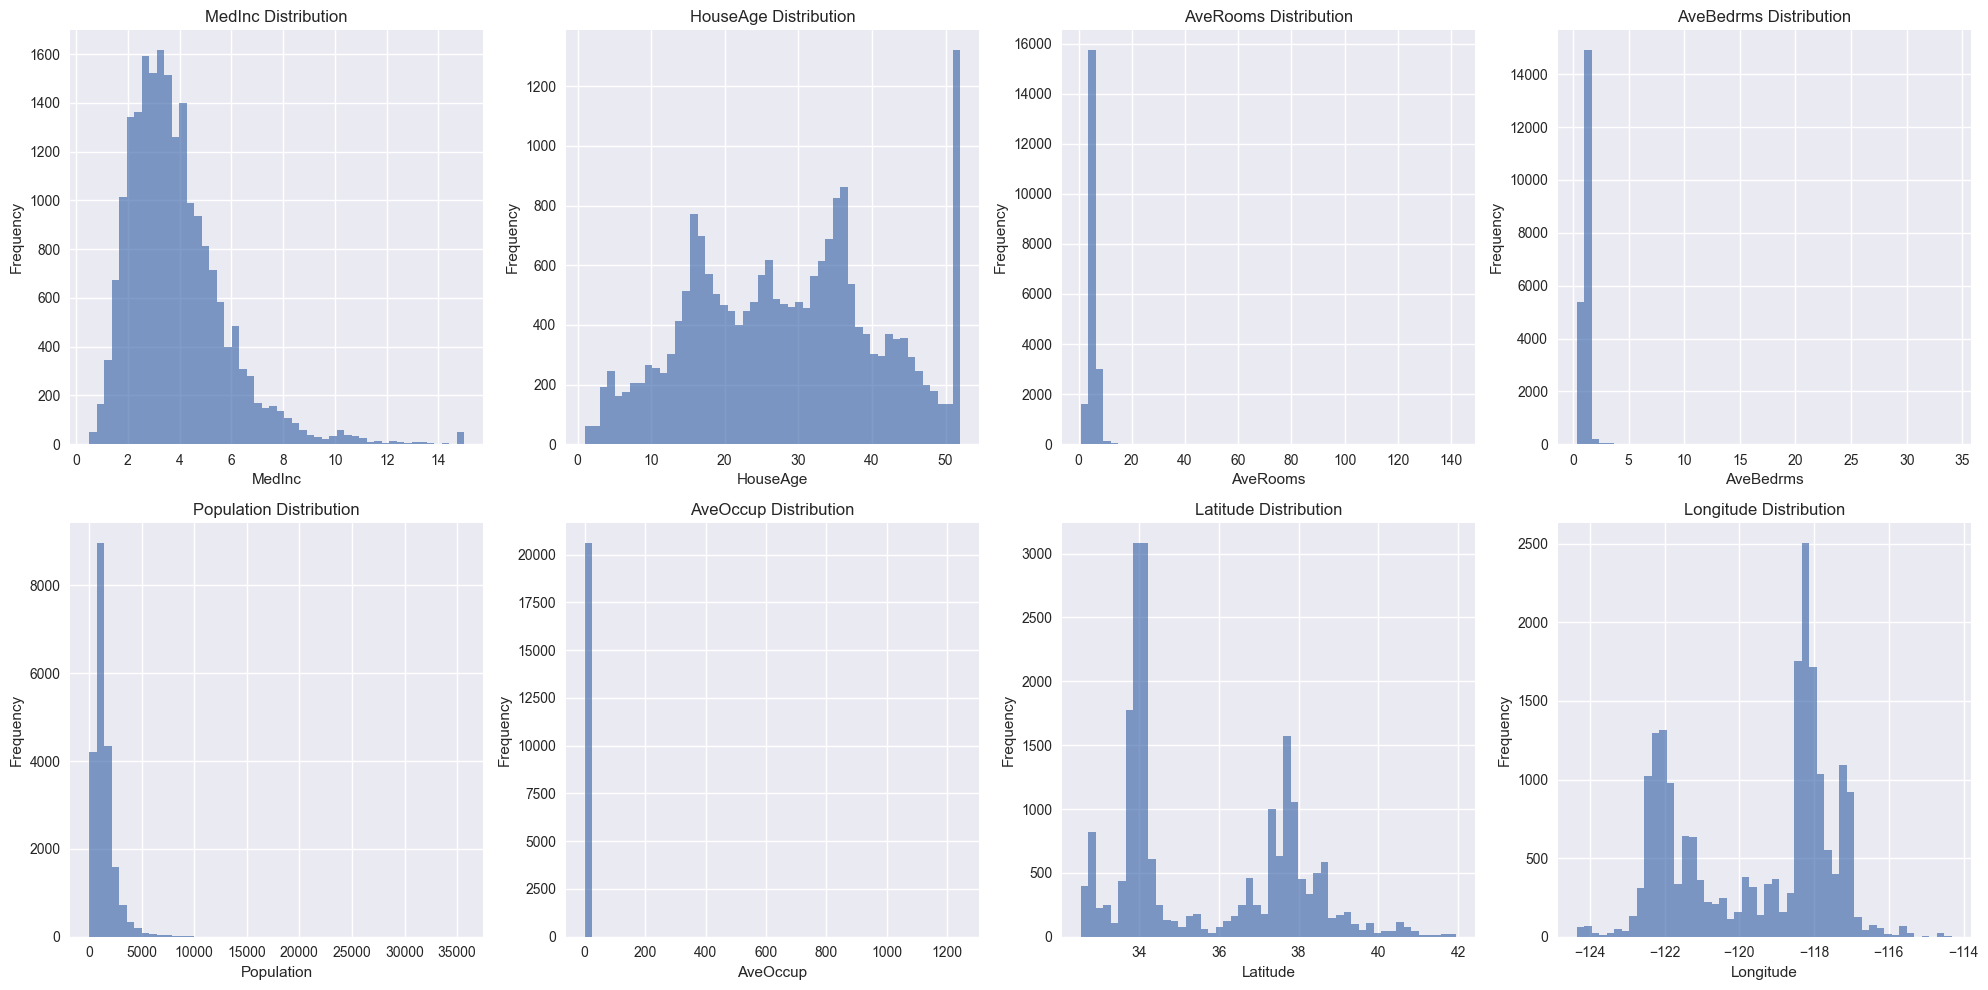

In [5]:
# Visualize distributions
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):
    axes[i].hist(df[col], bins=50, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

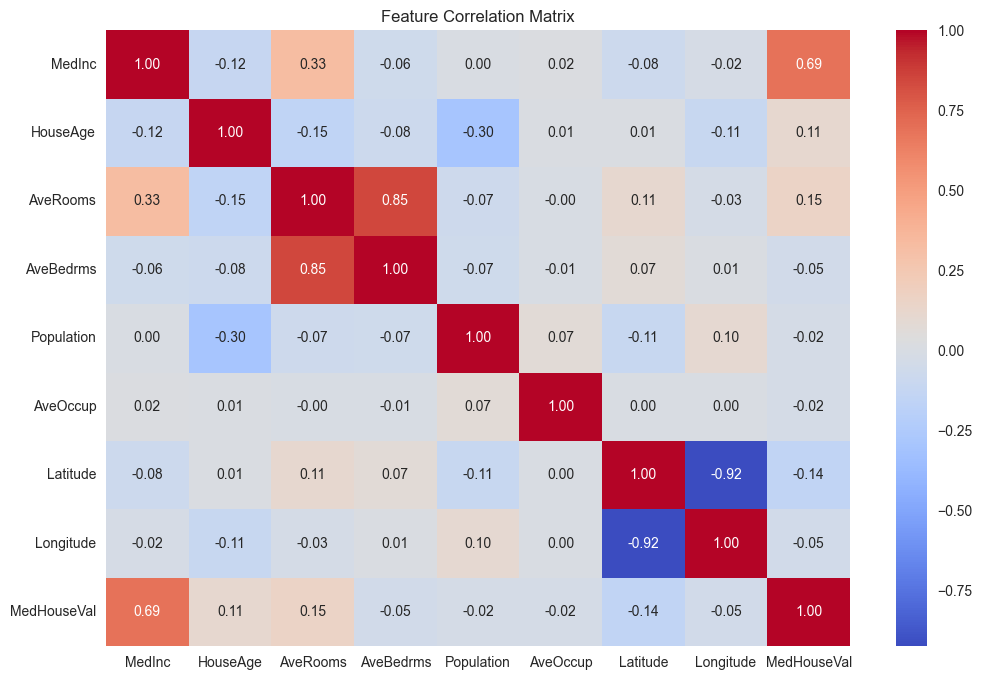

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

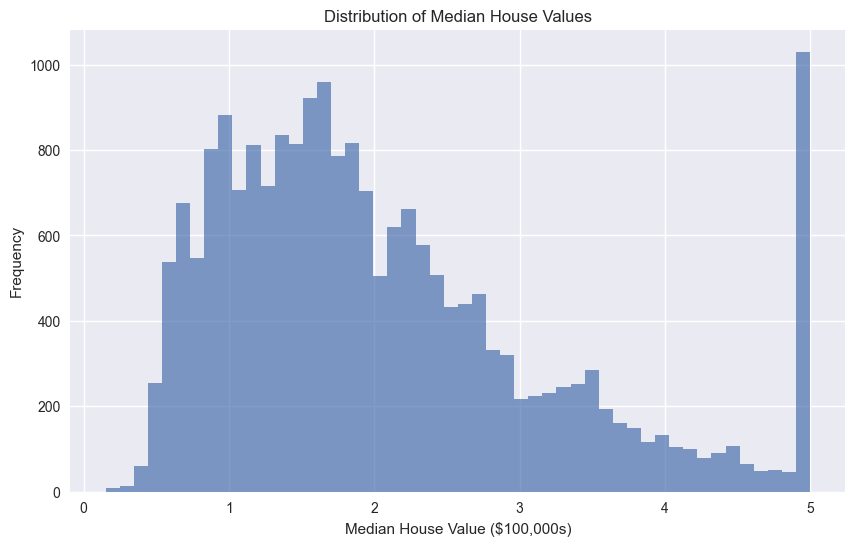

In [7]:
# Target distribution
plt.figure(figsize=(10, 6))
plt.hist(df['MedHouseVal'], bins=50, alpha=0.7)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

## 3. Data Preprocessing

Prepare the data for modeling: split into train/test and scale features.

In [8]:
# Split features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train target shape: {y_train.shape}, Test target shape: {y_test.shape}")

Train shape: (16512, 8), Test shape: (4128, 8)
Train target shape: (16512,), Test target shape: (4128,)


In [9]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## 4. Model Training

Train a Random Forest Regressor and evaluate performance.

In [10]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.2552
Root Mean Squared Error: 0.5051
R² Score: 0.8053


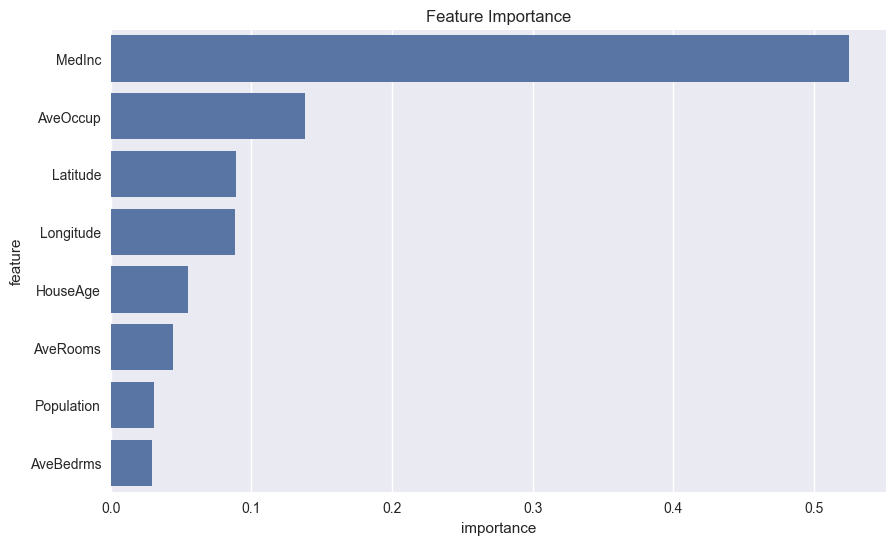

In [11]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

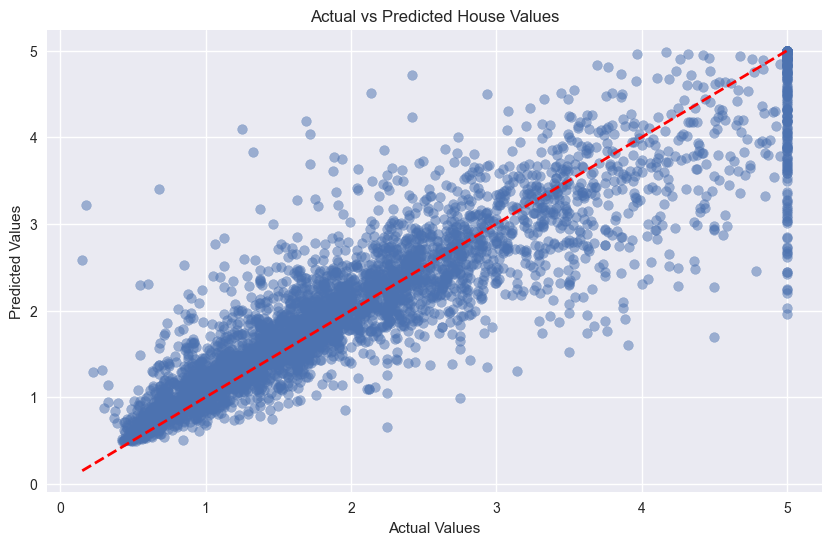

In [12]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()

## 5. Hyperparameter Tuning

Use GridSearchCV to find the best hyperparameters.

In [13]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {-grid_search.best_score_:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score: 0.2641


In [14]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model - MSE: {mse_best:.4f}, RMSE: {rmse_best:.4f}, R²: {r2_best:.4f}")

Best Model - MSE: 0.2532, RMSE: 0.5032, R²: 0.8067


## Summary

This notebook demonstrated a complete ML pipeline for California housing price prediction:
- Data loading and exploration
- Feature preprocessing
- Model training and evaluation
- Hyperparameter optimization

The Random Forest model achieved good performance with R² score around 0.8 after tuning.

### Next Steps
- Try other models (XGBoost, Linear Regression)
- Feature engineering
- Cross-validation
- Model deployment